## Агломеративная кластеризация

### Теория

Иерархическая кластеризация делится на две стратегии: агломеративная — снизу-вверх, объединяем точки в кластеры и дивизионная — сверху-вниз, разделяем один большой кластер на малые.

1. Назначаем каждой точке свой кластер.
2. Сортируем попарные расстояния между центрами кластеров по возрастанию.
3. Берём пару ближайших кластеров, склеиваем их в один и пересчитываем центр кластера.
4. Повторяем шаги 2-3 до тех пор, пока все данные не склеятся в один кластер.
5. Визуально это выглядит следующим образом:

<img src="https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/003-hierarchical-clustering-in-r/figures/002-agglomerative-clustering-visualize-dendrogram-1.png">

**Расстояние между кластерами:**

Поиск ближайших кластеров можно осуществлять с помощью разных методов объединения точек.

На практике используются следующие способы вычисления расстояний $R(C_{i}, C_{j})$ между кластерами $C_{i}$ и $C_{j}$:

* **Расстояние ближнего соседа.** 
$R^{б}(C_{i}, C_{j})=\min _{x_{i} \in C_{i}, x_{j} \in C_{j}}\|x_{i}-x_{j}\|$, где

    * $C_{i}, C_{j}$ - соседние кластеры
    * $x_{i} \in C_{i}$ - точка $x_{i}$, принадлежащая кластеру $C_{i}$
    * $x_{j} \in C_{j}$ - точка $x_{j}$, принадлежащая кластеру $C_{j}$
    * $\|x_{i}-x_{j}\|$ - расстояние между точками $x_{i}$ и $x_{j}$
    * $\min _{x_{i} \in C_{i}, x_{j} \in C_{j}}\|x_{i}-x_{j}\|$ - минимальное расстояние между двумя точками $x_{i}$ и $x_{j}$ (**расстояние ближнего соседа**)
    

* **Расстояние дальнего соседа.**
$R^{д}(C_{i}, C_{j})=\max _{x_{i} \in C_{i}, x_{j} \in C_{j}}\|x_{i}-x_{j}\|$, где

    * $C_{i}, C_{j}$ - соседние кластеры
    * $x_{i} \in C_{i}$ - точка $x_{i}$, принадлежащая кластеру $C_{i}$
    * $x_{j} \in C_{j}$ - точка $x_{j}$, принадлежащая кластеру $C_{j}$
    * $\|x_{i}-x_{j}\|$ - расстояние между точками $x_{i}$ и $x_{j}$
    * $\max _{x_{i} \in C_{i}, x_{j} \in C_{j}}\|x_{i}-x_{j}\|$ - максимальное расстояние между двумя точками $x_{i}$ и $x_{j}$ (**расстояние дальнего соседа**)


* **Групповое среднее расстояние.**
$R^{ср}(C_{i}, C_{j})=\frac{1}{n_{i} n_{j}} \sum_{x_{i} \in C_{i}} \sum_{x_{j} \in C_{j}}\|x_{i}-x_{j}\|$, где
    * $C_{i}, C_{j}$ - соседние кластеры
    * $x_{i} \in C_{i}$ - точка $x_{i}$, принадлежащая кластеру $C_{i}$
    * $x_{j} \in C_{j}$ - точка $x_{j}$, принадлежащая кластеру $C_{j}$
    * $\|x_{i}-x_{j}\|$ - расстояние между точками $x_{i}$ и $x_{j}$
    * ${n_{i} n_{j}}$ - количество связей (расстояний) между всеми точками кластера $C_{i}$ и кластера $C_{j}$
    * $\sum_{x_{i} \in C_{i}}$ - все точки кластера $C_{i}$
    * $\sum_{x_{j} \in C_{j}}$ - все точки кластера $C_{j}$
    * $\sum_{x_{i} \in C_{i}} \sum_{x_{j} \in C_{j}}\|x_{i}-x_{j}\|$ - сумма всех расстояний между всеми точками кластера $C_{i}$ и всеми точками кластера $C_{j}$
    * $\frac{1}{n_{i} n_{j}} \sum_{x_{i} \in C_{i}} \sum_{x_{j} \in C_{j}}\|x_{i}-x_{j}\|$ - **групповое среднее расстояние** (делим сумму всех расстояний между всеми точками кластера $C_{i}$ и всеми точками кластера $C_{j}$ на кол-во связей ${n_{i} n_{j}}$)
    
    

* **Расстояние между центрами.**
$R^{ц}(C_{i}, C_{j})=\|\mu_{i}-\mu_{j}\|$ , где
    * $C_{i}, C_{j}$ - соседние кластеры
    * $\mu_{i}$ - центр кластера $C_{i}$
    * $\mu_{j}$ - центр кластера $C_{j}$
    * $\|\mu_{i}-\mu_{j}\|$ - **расстояние между центрами**.

<img src="https://i.ibb.co/J7xf6PX/ml-4-4-2.png" width=700>

Агломеративные или восходящие алгоритмы - это такие алгоритмы, в которых объекты объединяются во всё более и более крупные кластеры.

Сначала каждый объект считается отдельным кластером. Для одноэлементных кластеров (кластеров, состоящих из одного элемента) естественным образом определяется функция расстояния **R**

* $R\left(\{x\},\left\{x^{\prime}\right\}\right)=\rho\left(x, x^{\prime}\right)$, где

    * $\{x\},\left\{x^{\prime}\right\}$ - одноэлементные кластеры
    * $\rho\left(x, x^{\prime}\right)$ - расстояние между одноэлементными кластерами

Затем запускается процесс слияний. Примем следующие обозначения кластеров для удобства записи формул:
* $U$ - это кластер $C{i}$
* $V$ - это кластер $C{j}$
* $S$ - это кластер $C{k}$
    
На каждой итерации вместо пары самых близких кластеров $U$ и $V$ образуется новый кластер $W=U \cup V .$ Расстояние от нового кластера $W$ до любого другого кластера $S$ вычисляется по расстояниям $R(U, V)$, $R(U, S)$ и $R(V, S),$ которые к этому моменту уже должны быть известны:


**Формула Ланса-Уильямса:**

* $R(U \cup V, S)=\alpha_{U} R(U, S)+\alpha_{V} R(V, S)+\beta R(V, S)+\gamma|R(U, S)-R(V, S)|$

    * где $\alpha_{U}, \alpha_{U}, \beta, \gamma-$ числовые параметры.

Эта универсальная формула обобщает практически все разумные способы определить расстояние между кластерами.

**Расстояние Уорда:**

В качестве расстояния между кластерами берется прирост суммы квадратов расстояний объектов до центров кластеров, получаемый в результате их объединения. В отличие от других методов кластерного анализа для оценки расстояний между кластерами, здесь используются методы дисперсионного анализа.

* $\begin{array}{l} R^{w}(W, S)=\frac{|S||W|}{|S|+|W|}  \rho^{2}\left(\sum_{w \in W} \frac{w}{|W|}, \sum_{s \in S} \frac{s}{|S|}\right) \\ \alpha_{U}=\frac{|S|+|U|}{|S|+|W|}, \alpha_{V}=\frac{|S|+|V|}{|S|+|W|}, \beta=\frac{-|S|}{|S|+|W|}, \gamma=0 \end{array}$

![](https://drek4537l1klr.cloudfront.net/rhys/v-7/Figures/CH17_FIG_3_MLR.png)

### Практика

In [ ]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
plt.rcParams['figure.figsize'] = 8, 4

In [ ]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 100

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

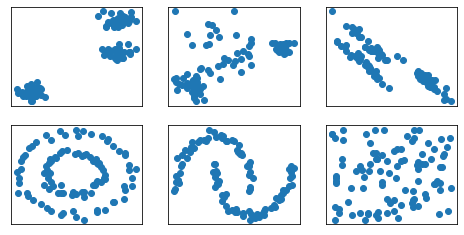

In [ ]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

![AG](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif "Агломеративная кластеризация")

![AG](https://drive5.com/usearch/manual/agg_fig.gif "Агломеративная кластеризация")



Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Будем поочередно объединять близлежащие объекты (кластеры), пока весь датасет не войдёт в кластеры. Посмотрим, как реализуется агломеративная кластеризация в пакете Sklearn. При инициализации можно задать количество кастеров, функцию расстояния, способ определения ближайшего соседа:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=None,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

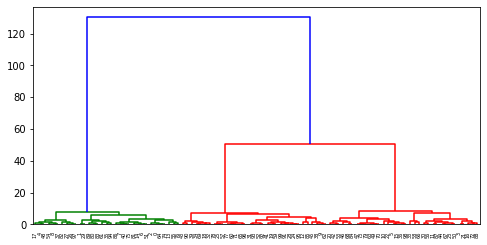

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(blobs)

plot_dendrogram(model)

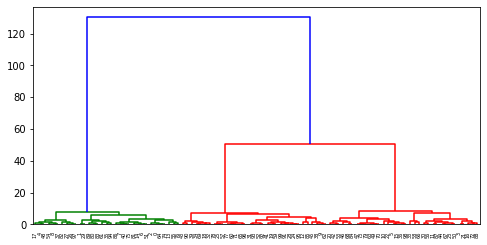

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(blobs)

plot_dendrogram(model)

In [ ]:
plt.rcParams['figure.figsize'] = 6, 3

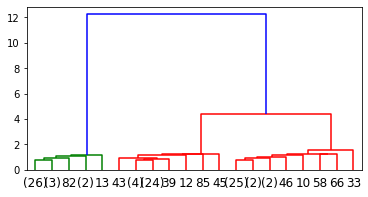

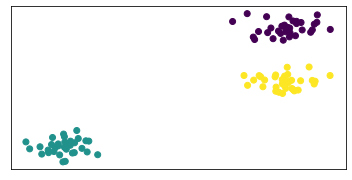

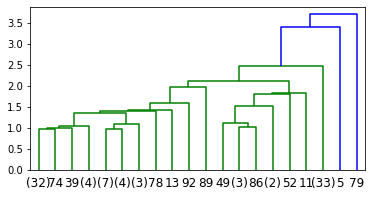

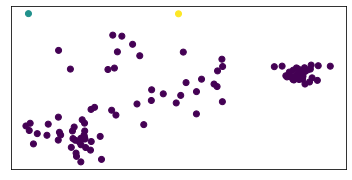

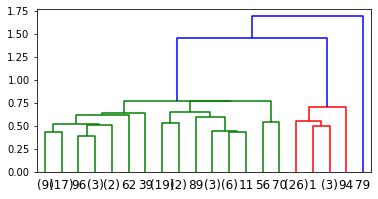

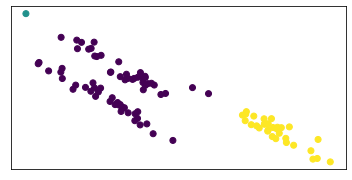

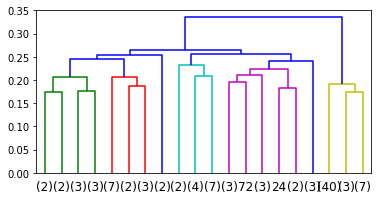

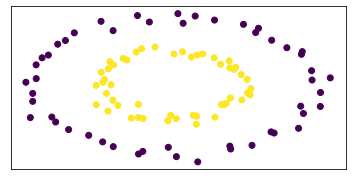

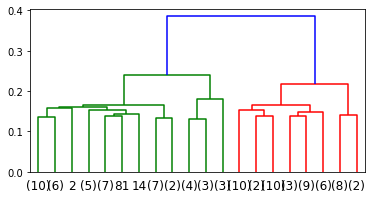

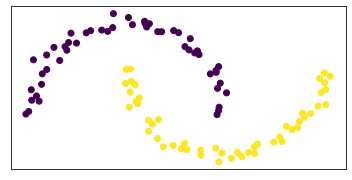

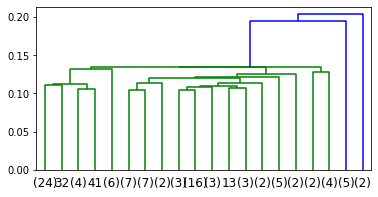

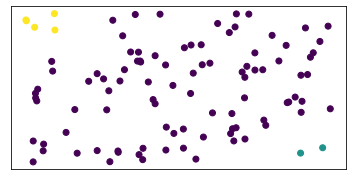

In [ ]:
for X, n_clusters in zip(datasets_list, [3,3,3,2,2,3]):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')
    model = model.fit(X)
    plot_dendrogram(model, **{'p':20, 'truncate_mode':'lastp'}) 
    plt.show()
    
    
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1], c=model.fit_predict(X))
    plt.show()

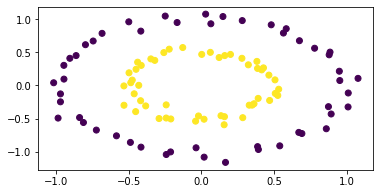

In [ ]:
# datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]

model = AgglomerativeClustering(n_clusters=2, linkage='single')
xx = noisy_circles
plt.scatter(xx[:,0], xx[:,1], c=model.fit_predict(xx));

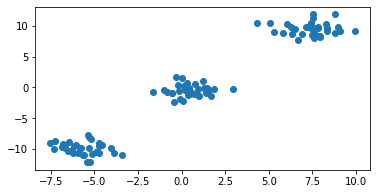

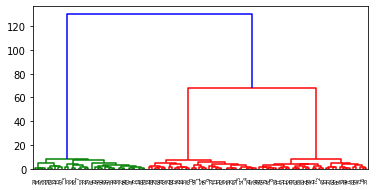

In [ ]:
blobs = datasets.make_blobs(n_samples=100, random_state=8, n_features=4)
X, y = blobs
blobs = X
plt.scatter(X[:, 0], X[:, 1])
plt.show()


model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(blobs)

plot_dendrogram(model)
plt.show()

In [ ]:
X.shape

(100, 4)

Посмотрим, как агломеративная кластеризация будет работать с нашими наборами данных. Мы будем варьировать только число кластеров. Будем также использовать матрицу смежности, для которой нужен параметр `n_neighbors`, то есть число ближайших соседей.

Примечание. Матрица смежности — это матрица, которая соответствует графу, и которая отражает, с какими соседями объект соединен или нет. Например, на рисунке ниже объект а соединен с е, f, b, поэтому на пересечении  строки(столбца) а со столбцами (строками) e, f, b стоят единички.

<img src="https://i.ibb.co/mtJcz3R/ml-4-7-1.png">

Вместо единичек, которые показывают, есть связь или нет, могут быть другие характеристики. Например, расстояние между объектами.

Мы используем здесь матрицу смежности по той причине,что агломеративная кластеризация строится в качестве одного из вариантов именно по такой матрице, которая показывает, сколько ближайших соседей находится рядом с объектом.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_agglomerative.py:502: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_agglomerative.py:502: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_agglomerative.py:502: UserWarning: the number of connected components of the connectivity matrix is 8 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


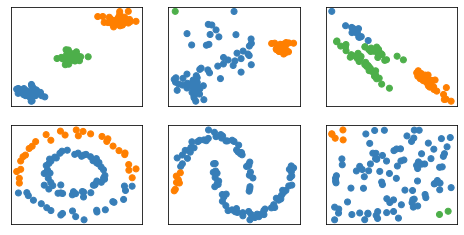

In [ ]:
import warnings
plt.rcParams['figure.figsize'] = 8,4
from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})
]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="Error",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

В алгоритме мы сначала нормализуем признаки объектов, а затем строим матрицу смежности. Так мы получаем расстояние между объектами датасета. Далее создаём объект агломеративной кластеризации и передаём в него матрицу. Обучаем алгоритм, игнорируем предупреждения и строим предсказания.

В результате агломеративная кластеризация справилась лучше, чем EM-алгоритм со сложными кластерами, с ленточными, наоборот, хуже. При отсутствии кластерной структуры агломеративная кластеризация более явно определяет это.

## Спектральная кластеризация

### Теория

Для выполнения спектральной кластеризации нам потребуется 3 основных шага:
1. Создайте граф подобия между нашими N объектами для кластеризации.
2. Вычислите первые k собственных векторов его матрицы Лапласа, чтобы определить вектор признаков для каждого объекта.
3. Запустите k-средство для этих функций, чтобы разделить объекты на k классов.

Хороший способ представления набора точек данных x1,. . . x N имеет форму графа подобия G = (V, E).

<img src="https://miro.medium.com/max/1400/1*xf0bKxqYRVMAQGaNAAgw8g.jpeg" width=700>

Есть разные способы построить граф, представляющий отношения между точками данных:
* Граф ε-окрестностей: каждая вершина соединена с вершинами, попадающими в шар радиуса ε, где ε - действительное значение, которое необходимо настроить, чтобы уловить локальную структуру данных.
* Граф k-ближайших соседей: каждая вершина соединена со своими k-ближайшими соседями, где k - целое число, которое контролирует локальные отношения данных.

<img src="https://miro.medium.com/max/1400/1*A2ic_xbhGmd8zWPr3BxlrA.png" width=700>

В приведенном выше примере мы нарисовали 3 кластера: две «луны» и гауссовский.

В графе ε-окрестностей мы видим, что трудно выбрать полезный параметр ε. При ε = 0,3, как на рисунке, точки на средней луне уже очень тесно связаны, в то время как точки на гауссиане почти не связаны. Эта проблема всегда возникает, если у нас есть данные «в разных масштабах», то есть расстояния между точками данных различаются в разных регионах пространства. Однако граф k-ближайших соседей может соединять точки «в разных масштабах». Мы видим, что точки на гауссиане с низкой плотностью связаны с точками на луне с высокой плотностью.

In [ ]:
def f(*y, **x):
    return y, x

xxx = {'k':1, 'b':2}

f(1,2,3,4,5, **xxx)

((1, 2, 3, 4, 5), {'k': 1, 'b': 2})

In [ ]:
from sklearn.cluster import SpectralClustering


In [ ]:
params = {'n_clusters':7, 'n_neighbors':20}
SpectralClustering(**params)

SpectralClustering(n_clusters=7, n_neighbors=20)

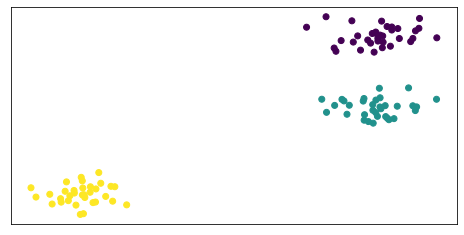

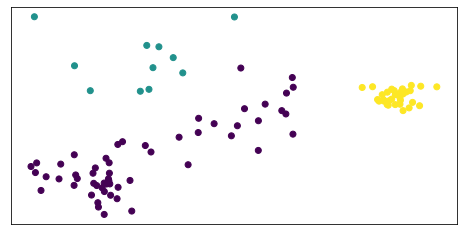

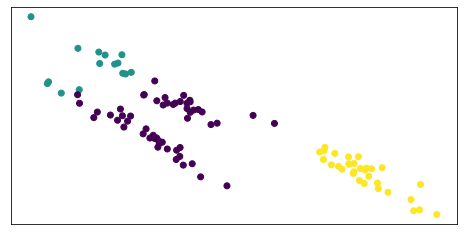

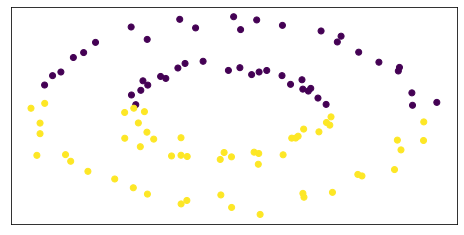

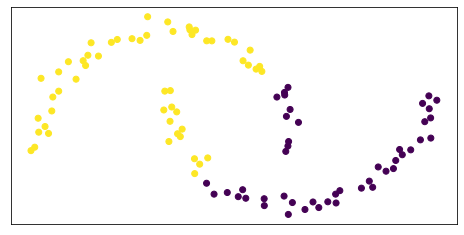

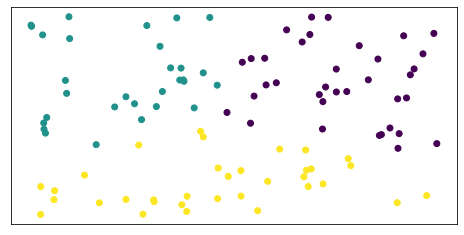

In [ ]:
for X, n_clusters in zip(datasets_list, [3,3,3,2,2,3]):    
    model = SpectralClustering(n_clusters=n_clusters, n_neighbors=2)
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1], c=model.fit_predict(X))
    plt.show()

Теперь, когда у нас есть граф, нам нужно сформировать связанную с ним матрицу лапласиана.
Примечание: Основными инструментами спектральной кластеризации являются матрицы Лапласа графов.

<img src="https://miro.medium.com/max/1400/1*GD0E2nvpj853wOz5WTB35Q.jpeg" width=700>

Все, что нам нужно сделать сейчас, это вычислить собственные векторы u_ j оператора L. Запустим алгоритм k-means.

**Как выбрать k?**

Проектируя точки в нелинейное вложение и анализируя собственные значения матрицы Лапласа, можно вывести количество кластеров, присутствующих в данных. Когда граф подобия не полностью связан, кратность собственного значения λ = 0 дает нам оценку k.

### Практика

Для практики воспользуемся датасетом по кредитным картам (`CC GENERAL.csv`).

* CUSTID : идентификатор держателя кредитной карты
* BALANCE : сумма баланса, оставшаяся на счете
* BALANCEFREQUENCY : как часто обновляется баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = не часто обновляется)
* PURCHASES : количество покупок, совершенных со счета.
* ONEOFFPURCHASES: максимальная сумма покупки за один раз
* INSTALLMENTSPURCHASES : Сумма покупки в рассрочку
* CASHADVANCE : Наличные деньги, предоставленные пользователем заранее
* PURCHASESFREQUENCY : Как часто совершаются покупки, оценка от 0 до 1 (1 = часто покупают, 0 = не часто покупают)
* ONEOFFPURCHASESFREQUENCY : как часто покупки совершаются за один раз (1 = часто покупают, 0 = не часто покупают)
* PURCHASESINSTALLMENTSFREQUENCY : Как часто совершаются покупки в рассрочку (1 = часто, 0 = не часто)
* CASHADVANCEFREQUENCY : как часто выплачивается предоплата наличными
* CASHADVANCETRX : количество транзакций, совершенных с помощью "Cash in Advanced"
* PURCHASESTRX : количество совершенных транзакций покупки
* CREDITLIMIT : Лимит кредитной карты для пользователя
* PAYMENTS : Сумма платежа, произведенного пользователем
* MINIMUM_PAYMENTS : минимальная сумма платежей, производимых пользователем
* PRCFULLPAYMENT : процент полной оплаты, оплаченной пользователем
* TENURE : Срок действия кредитной карты для пользователя

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

In [ ]:
raw_df = pd.read_csv('CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis=1)
raw_df.fillna(method='ffill', inplace=True)
raw_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(raw_df)

X_normalized = normalize(X_scaled)

X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544826
2,0.330633,0.268880
3,-0.481657,-0.097612
4,-0.563512,-0.482505


In [ ]:
spectral_model_rbf = SpectralClustering(n_clusters=2, affinity='rbf')

labels_rbf = spectral_model_rbf.fit_predict(X_principal)

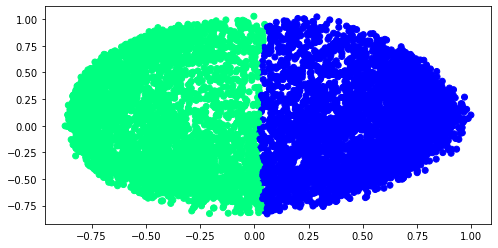

In [ ]:
plt.scatter(X_principal['P1'],
            X_principal['P2'],
            c=SpectralClustering(n_clusters=2,
                                 affinity='rbf').fit_predict(X_principal),
            cmap=plt.cm.winter)
plt.show()

In [ ]:
spectral_model_nn = SpectralClustering(n_clusters=2,
                                       affinity='nearest_neighbors')

labels_nn = spectral_model_nn.fit_predict(X_principal)

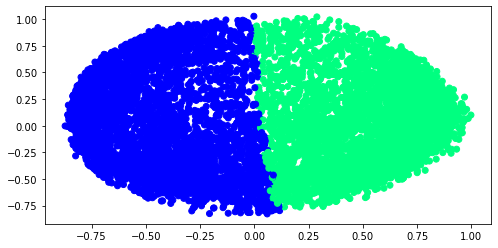

In [ ]:
plt.scatter(X_principal['P1'],
            X_principal['P2'],
            c=SpectralClustering(
                n_clusters=2,
                affinity='nearest_neighbors').fit_predict(X_principal),
            cmap=plt.cm.winter)
plt.show()

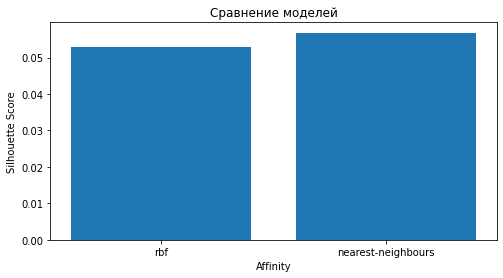

[0.05292277057364642, 0.05682401586798114]


In [ ]:
affinity = ['rbf', 'nearest-neighbours'] 
  
s_scores = [] 
  
s_scores.append(silhouette_score(raw_df, labels_rbf)) 
s_scores.append(silhouette_score(raw_df, labels_nn)) 
  
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Сравнение моделей') 
plt.show() 

print(s_scores)

## Метрики для кластеризации

Рассмотрим методы, с помощью которых можно оценить качество кластеризации. Обычно выделяют две большие группы методов:

* Внешние — те, которые основаны на сравнении результата кластеризации с априори известным разделением на классы.
* Внутренние — те, которые отображают качество кластеризации только по информации в данных.

**Функционалы качества**

Существует очень много различных функционалов качества для кластеризации, но не существует наилучшего или оптимального. Каждый метод кластеризации можно рассматривать как алгоритм поиска оптимального значения некоторого функционала.

* Среднее внутрикластерное расстояние:

$F_0=\frac{\sum [y_i=y_j]\rho (x_i,x_j)}{\sum [y_i=y_j]}$ — значение данного функционала должно быть как можно меньше, чтобы объекты располагались как можно ближе друг к другу внутри кластера.

* Среднее межкластерное расстояние:

$F_1=\frac{\sum [y_i\neq y_j]\rho (x_i,x_j)}{\sum [y_i\neq y_j]}$ — значение этого функционала должно быть как можно больше, чтобы объекты из разных кластеров находились друг от друга как можно дальше.

* Отношение этих двух расстояний:

$\frac{F_0}{F_1}\rightarrow min$  —  мы можем учитывать оба функционала, рассмотренные ранее( расстояние внутри кластера и между кластерами), и оптимизировать его. Естественно, нам нужно, чтобы оно было минимально (это будет достигаться, если расстояние между кластерами максимально, а внутри кластера — минимально).

* Среднее расстояние до центра:

$\phi_0=\sum_{y\in Y}\frac{1}{|K_y|}\sum_{i:y_i=y}\rho^{2}(x_i,\mu_y)$ — должно быть как можно меньше, чтобы объекты располагались максимально близко к центру кластера.

* Сумма межкластерных расстояний:

$\phi_1=\sum_{y_i=y}\rho^{2}(\mu_i,\mu)$ — должно быть максимальным, так как кластеры должны находиться друг от друга на как можно большем расстоянии.

* Отношение этих двух расстояний:

$\frac{\phi_0}{\phi_1}\rightarrow min$

**Коэффициент силуэта**

Значение силуэта показывает, насколько объект похож на свой кластер по сравнению с другими кластерами.

* a — среднее расстояние от данного объекта до объектов из того же кластера.
* b — среднее расстояние от данного объекта до объектов из ближайшего кластера.

$$S=\frac{b-a}{max(a,b)}$$

Значение коэффициента находится в диапазоне от -1 до +1, где высокое значение указывает, что объект хорошо согласуется с кластером, которому он принадлежит, и плохо согласуется с «чужими» кластерами. Если у подавляющего большинства объектов этот коэффициент высокий, то можно считать кластеризацию достаточно качественной. Если же у большого числа объектов низкий или отрицательный коэффициент силуэта, то, возможно, кластеров слишком много, слишком мало или просто данные плохо поддаются разделению на кластеры.


![](https://2.bp.blogspot.com/-dQi4lSpbbnw/Wpr7iFzrjFI/AAAAAAAACps/qliCgVQ1gW4Jrri_UT_7d9JKI_LXd0n8wCLcBGAs/s1600/ssi-formula.png)

**Проверка наличия кластерной структуры**

1. Генерируем p случайных точек из равномерного распределения.
2. Генерируем p случайных точек из обучающей выборки.
3. Вычисляем величину:
$$H_{i n d}=\frac{\sum_{n} w_{i}}{\sum_{n} q_{i}+\sum_{n} w_{i}}$$

Эта статистика является одним из индикаторов тенденции к группированию. Для её расчета создается B псевдо-наборов данных, сгенерированных случайным образом на основе распределения с тем же стандартным отклонением, что и оригинальный набор данных. Для каждого наблюдения i из n рассчитывается среднее расстояние до k ближайших соседей: w между реальными объектами и q между искусственными объектами и их ближайшими реальными соседями. Если статистика превышает значение 0.5, то мы оставляем нулевую гипотезу, которая заключается в том, что q и w подобны и группируемые объекты распределены однородно и случайно

В случае, если статистика меньше чем 0.25, можно с 90% уверенностью отвергнуть нулевую гипотезу в пользу альтеративной, которая говорит о наличии тенденции к группировке данных.

**Внешние метрики**

Если исходные данные размечены, то мы можем использовать метки объектов для измерения качества кластеризации.

**Однородность** — кластер состоит только из объектов одного класса:

$$h=1-\frac{H(C|K)}{H(C)}$$

В данной формуле H(C|K) — энтропия класса при условии кластера, а H(C) — энтропия класса

То есть, максимальное значение однородность достигает в том случае, если в кластере объекты одного класса.

**Полнота** — достигает максимальное значение в том случае, когда все объекты из класса принадлежат одному кластеру:

$$c=1-\frac{H(K|C)}{H(K)}$$

В данной формуле H(K|C) — энтропия кластера при условии класса, а H(K)  — энтропия кластера.

**V-мера** — среднее гармоническое однородности и полноты, то есть метрика,  объединяющая эти два показателя:

$$u=2\frac{hc}{h+c}$$

### Коэффициент силуэта

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

0.5131660482634046

В качестве параметров в функции silhouette_score используются:

* X — массив признаков объектов выборки или массив попарных расстояний между объектами;
* Y — массив предсказанных кластеров для объектов выборки;
* metric — метрика, используемая для вычисления расстояния между объектами, мы будем использовать euclidean (Евклидово расстояние), полный список названий метрик можно увидеть [здесь](https://scikit-learn.org/0.19/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html).

Документация коэффициента силуэта [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

### Однородность

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
X = StandardScaler().fit_transform(X)
kmeans.fit(X) 
kmeans_pred = kmeans.labels_ 
# теперь посчитаем однородность 
homogeneity_score(labels_true=y, labels_pred=kmeans_pred)

0.804474693112785

Полное описание функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html).

### Полнота

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import completeness_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
completeness_score(labels_true=y, labels_pred=kmeans_pred)

0.7828224102025245

Документация [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html).

### V-мера

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем однородность
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.793500872513578

Документация [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html).